### Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import pyplot
import mysql.connector
import csv
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.metrics import mean_squared_error
import statsmodels.graphics.tsaplots as tsa_plots
from math import sqrt

#### Import Dataset

In [3]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="127.0.0.1",
    database="medicines_db",
    user="root",
    password="khairun16")

In [4]:
with conn.cursor() as cur:
    cur.execute("SELECT * FROM pharma_data")
    rows = cur.fetchall()

In [5]:
for row in rows:
    print(row)
pharma_data = pd.DataFrame(rows, columns=["Typeofsales", "Patient_ID", "Specialisation", "Dept", "Dateofbill", "Quantity",
                           "ReturnQuantity", "Final_Cost", "Final_Sales", "RtnMRP", "Formulation", "DrugName", "SubCat", "SubCat1"])

('Sale', '12018098765', 'Specialisation6', 'Department1', datetime.date(2022, 6, 1), 1, 0, Decimal('55.406'), Decimal('59.260'), Decimal('0.000'), 'Form1', 'ZINC ACETATE 20MG/5ML SYP', 'SYRUP & SUSPENSION', 'VITAMINS & MINERALS')
('Sale', '12018103897', 'Specialisation7', 'Department1', datetime.date(2022, 7, 23), 1, 0, Decimal('768.638'), Decimal('950.800'), Decimal('0.000'), 'Form1', 'CEFTAZIDIME 2GM+AVIBACTAM 500MG', 'INJECTIONS', 'ANTI-INFECTIVES')
('Sale', '12018101123', 'Specialisation2', 'Department3', datetime.date(2022, 6, 23), 1, 0, Decimal('774.266'), Decimal('4004.214'), Decimal('0.000'), 'Form2', 'EPTIFIBATIDE 0.75MG/ML', 'INJECTIONS', 'CARDIOVASCULAR & HEMATOPOIETIC SYSTEM')
('Sale', '12018079281', 'Specialisation40', 'Department1', datetime.date(2022, 3, 17), 2, 0, Decimal('40.798'), Decimal('81.044'), Decimal('0.000'), 'Form1', 'WATER FOR INJECTION 10ML SOLUTION', 'INJECTIONS', 'INTRAVENOUS & OTHER STERILE SOLUTIONS')
('Sale', '12018117928', 'Specialisation5', 'Departme

In [6]:
pharma_data.head(10)

Typeofsales   Patient_ID    Specialisation         Dept  Dateofbill  \
0        Sale  12018098765   Specialisation6  Department1  2022-06-01   
1        Sale  12018103897   Specialisation7  Department1  2022-07-23   
2        Sale  12018101123   Specialisation2  Department3  2022-06-23   
3        Sale  12018079281  Specialisation40  Department1  2022-03-17   
4        Sale  12018117928   Specialisation5  Department1  2022-12-21   
5      Return  12018103662   Specialisation2  Department1  2022-07-15   
6        Sale  12018097585   Specialisation2  Department1  2022-05-22   
7        Sale  12018077721   Specialisation4  Department1  2022-01-12   
8        Sale  12018096500   Specialisation4  Department2  2022-08-24   
9        Sale  12018071649   Specialisation4  Department1  2022-08-31   

   Quantity  ReturnQuantity Final_Cost Final_Sales   RtnMRP Formulation  \
0         1               0     55.406      59.260    0.000       Form1   
1         1               0    768.638     950.800    0.000       Form1   
2         1               0    774.266    4004.214    0.000       Form2   
3         2               0     40.798      81.044    0.000       Form1   
4         1               0     40.434      40.504    0.000       Form1   
5         0               8     47.902       0.000  330.288       Form1   
6         1               0     41.862      42.218    0.000       Form1   
7         3               0     60.026     142.752    0.000       Form1   
8         2               0     49.856      94.000    0.000       Form2   
9         1               0    258.860     319.800    0.000       Form1   

                            DrugName                        SubCat  \
0          ZINC ACETATE 20MG/5ML SYP            SYRUP & SUSPENSION   
1    CEFTAZIDIME 2GM+AVIBACTAM 500MG                    INJECTIONS   
2             EPTIFIBATIDE 0.75MG/ML                    INJECTIONS   
3  WATER FOR INJECTION 10ML SOLUTION                    INJECTIONS   
4                      LORAZEPAM 1MG            TABLETS & CAPSULES   
5                   SALBUTAMOL 2.5MG           INHALERS & RESPULES   
6                 FUROSEMIDE 10MG/ML                    INJECTIONS   
7          SODIUM CHLORIDE IVF 100ML  IV FLUIDS, ELECTROLYTES, TPN   
8        SODIUM BICARBONATE 8.5% INJ                    INJECTIONS   
9          PEPTIDE BASED DIET POWDER       NUTRITIONAL SUPPLEMENTS   

                                 SubCat1  
0                    VITAMINS & MINERALS  
1                        ANTI-INFECTIVES  
2  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
3  INTRAVENOUS & OTHER STERILE SOLUTIONS  
4                 CENTRAL NERVOUS SYSTEM  
5                     RESPIRATORY SYSTEM  
6  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
7  INTRAVENOUS & OTHER STERILE SOLUTIONS  
8  INTRAVENOUS & OTHER STERILE SOLUTIONS  
9                              NUTRITION

In [7]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

#### Dataframe Shape & Data Type

In [8]:
pharma_data.shape

(14218, 14)

In [9]:
pharma_data.dtypes

Typeofsales       object
Patient_ID        object
Specialisation    object
Dept              object
Dateofbill        object
Quantity           int64
ReturnQuantity     int64
Final_Cost        object
Final_Sales       object
RtnMRP            object
Formulation       object
DrugName          object
SubCat            object
SubCat1           object
dtype: object

#### Type Casting

In [10]:
pharma_data["Patient_ID"] = pharma_data["Patient_ID"].astype('str')
pharma_data["Final_Sales"] = pharma_data["Final_Sales"].astype('float32')
pharma_data["Final_Cost"] = pharma_data["Final_Cost"].astype('float32')

In [11]:
pharma_data.dtypes

Typeofsales        object
Patient_ID         object
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float32
Final_Sales       float32
RtnMRP             object
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

#### Handling Duplicates

In [12]:
duplicate = pharma_data.duplicated()  
sum(duplicate)

26

In [13]:
# Remove duplicates
pharma_data = pharma_data.drop_duplicates() 
duplicate = pharma_data.duplicated()
sum(duplicate) 

0

#### Handling Missing Values

In [14]:
pharma_data.replace('', pd.NA, inplace=True)

In [15]:
pharma_data.isnull().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        650
DrugName          1659
SubCat            1659
SubCat1           1682
dtype: int64

In [16]:
group_cols = ['Typeofsales', 'Specialisation', 'Dept']

##### Imputation (Mode)

In [17]:
# Impute missing values in Formulation column based on the mode of the group
for col in ['Formulation', 'DrugName', 'SubCat', 'SubCat1']:
    pharma_data[col] = pharma_data.groupby(group_cols)[col].apply(
        lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [18]:
pharma_data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       3
DrugName          6
SubCat            6
SubCat1           6
dtype: int64

In [19]:
# Still there are some missing values that need to be dropped
pharma_data.dropna(inplace=True)
pharma_data= pharma_data.reset_index(drop=True)
pharma_data.isnull().sum()

Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

#### Data Manipulation

In [20]:
date_column = 'Dateofbill'
pharma_data[date_column] = pd.to_datetime(pharma_data[date_column])

# Sort dataset by date column in ascending order
pharma_data = pharma_data.sort_values(by=date_column, ascending=True)

In [21]:
# Specify Final Cost column to round
column_name = 'Final_Cost'

# Specify number of decimal places to round to 0
decimal_places = 0

# Round the values in the column to 0
pharma_data[column_name] = pharma_data[column_name].apply(
    lambda x: round(x, decimal_places))

# Specify Final Sales column to round
column_name1 = 'Final_Sales'

# Specify number of decimal places to round to 0
decimal_places1 = 0

# Round values in the column to 0
pharma_data[column_name1] = pharma_data[column_name1].apply(
    lambda x: round(x, decimal_places1))


In [22]:
pharma_data.drop(columns=["ReturnQuantity"], axis=1, inplace=True)

In [23]:
pharma_data.head(10)

Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
13062        Sale  12018072643  Specialisation11  Department1 2022-01-01   
2433         Sale  12018080296  Specialisation27  Department1 2022-01-01   
9895         Sale  12018080633  Specialisation14  Department1 2022-01-01   
14140        Sale  12018075045   Specialisation4  Department1 2022-01-01   
3749         Sale  12018081111  Specialisation11  Department2 2022-01-01   
11030        Sale  12018076250   Specialisation5  Department1 2022-01-01   
12583        Sale  12018081448  Specialisation14  Department2 2022-01-01   
9755         Sale  12018081582   Specialisation3  Department1 2022-01-01   
6999         Sale  12018071876   Specialisation3  Department1 2022-01-01   
10879      Return  12018081506   Specialisation2  Department1 2022-01-01   

       Quantity  Final_Cost  Final_Sales   RtnMRP Formulation  \
13062         5        87.0        304.0    0.000       Form1   
2433          3        66.0        449.0    0.000       Form1   
9895          1        78.0        126.0    0.000       Form2   
14140         1        48.0         50.0    0.000       Form1   
3749          1        45.0         47.0    0.000       Form1   
11030         1        42.0         43.0    0.000       Form1   
12583         5        87.0        304.0    0.000       Form1   
9755          3        66.0        449.0    0.000       Form1   
6999          1        65.0         75.0    0.000       Form1   
10879         0       132.0          0.0  336.760       Form1   

                         DrugName              SubCat  \
13062       PANTOPRAZOLE 40MG INJ          INJECTIONS   
2433       PARACETAMOL 1GM IV INJ          INJECTIONS   
9895              ENOXAPARIN 40MG          INJECTIONS   
14140        FLUCONAZOLE 50MG TAB  TABLETS & CAPSULES   
3749               EPHEDRINE 30MG          INJECTIONS   
11030              GLYCOPYRROLATE          INJECTIONS   
12583        SODIUM CHLORIDE 0.9%          INJECTIONS   
9755       PARACETAMOL 1GM IV INJ          INJECTIONS   
6999   THYROXINE SODIUM 25MCG TAB  TABLETS & CAPSULES   
10879             ENOXAPARIN 60MG          INJECTIONS   

                                     SubCat1  
13062  INTRAVENOUS & OTHER STERILE SOLUTIONS  
2433                  CENTRAL NERVOUS SYSTEM  
9895   CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
14140                        ANTI-INFECTIVES  
3749   CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
11030                MUSCULO-SKELETAL SYSTEM  
12583  INTRAVENOUS & OTHER STERILE SOLUTIONS  
9755                  CENTRAL NERVOUS SYSTEM  
6999            ENDOCRINE & METABOLIC SYSTEM  
10879  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM

#### Describe Data

In [24]:
pharma_data.describe()

Quantity    Final_Cost   Final_Sales
count  14184.000000  14184.000000  14184.000000
mean       2.234490    124.692400    233.871898
std        5.137742    465.096326    671.491922
min        0.000000     40.000000      0.000000
25%        1.000000     45.000000     48.000000
50%        1.000000     54.000000     86.000000
75%        2.000000     78.000000    181.000000
max      150.000000  33178.000000  39490.000000

#### First Moment Business Decision 

##### Measure of Central Tendancy

In [25]:
# Mean
pharma_data.mean()

Patient_ID            inf
Quantity         2.234490
Final_Cost     124.692400
Final_Sales    233.871898
RtnMRP          29.144288
dtype: float64

In [26]:
# Median
pharma_data.median()

Patient_ID     1.201809e+10
Quantity       1.000000e+00
Final_Cost     5.400000e+01
Final_Sales    8.600000e+01
RtnMRP         0.000000e+00
dtype: float64

In [27]:
# Mode
pharma_data.mode()

Typeofsales   Patient_ID   Specialisation         Dept Dateofbill  Quantity  \
0        Sale  12018071649  Specialisation4  Department1 2022-07-09         1   

   Final_Cost  Final_Sales RtnMRP Formulation  \
0        42.0          0.0  0.000       Form1   

                          DrugName      SubCat  \
0  MULTIPLE ELECTROLYTES 500ML IVF  INJECTIONS   

                                 SubCat1  
0  INTRAVENOUS & OTHER STERILE SOLUTIONS

#### Second Moment Business Decision

##### Measure of Dispersion

In [28]:
# Variance
pharma_data.var()

Quantity           26.396396
Final_Cost     216314.592184
Final_Sales    450901.400990
dtype: float64

In [29]:
# Standard Deviation
print(pharma_data.std())

Dateofbill     104 days 11:56:23.006383184
Quantity                          5.137742
Final_Cost                      465.096326
Final_Sales                     671.491922
dtype: object


#### Third Moment Business Decision

##### Skewness

In [30]:
pharma_data.skew()

Patient_ID     -1.365236
Quantity       11.328894
Final_Cost     34.519563
Final_Sales    21.032940
RtnMRP         15.783219
dtype: float64

#### Fourth Moment Business Decision

##### Kurtosis

In [31]:
pharma_data.kurt()

Patient_ID        1.619381
Quantity        179.755564
Final_Cost     2025.283421
Final_Sales     949.513510
RtnMRP          402.708686
dtype: float64

#### EDA

In [32]:
pharma_data.Quantity.max()

150

(0.0, 160.0)

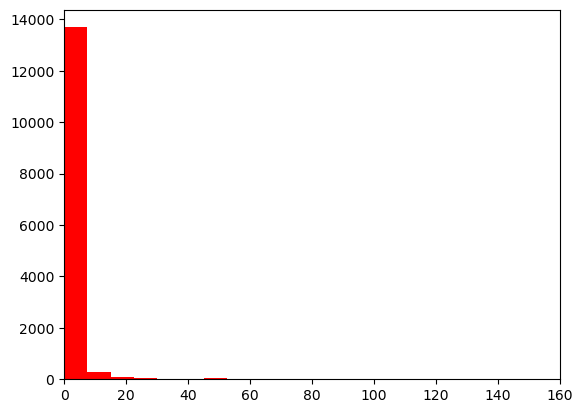

In [33]:
plt.hist(pharma_data.Quantity, color = 'red', bins = 20, alpha = 1)
plt.xlim(0,160)

In [34]:
pharma_data.Final_Cost.max()

33178.0

(0.0, 3500.0)

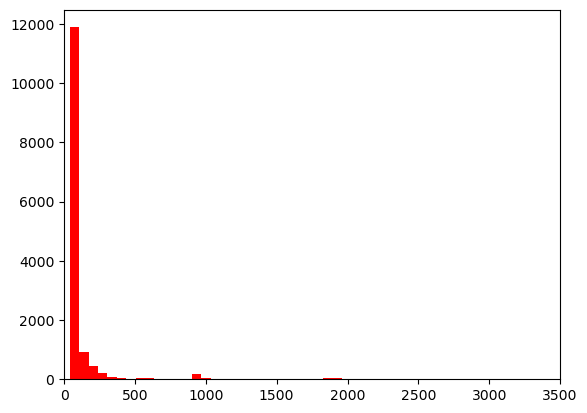

In [35]:
plt.hist(pharma_data.Final_Cost, color = 'red', bins = 500, alpha = 1)
plt.xlim(0,3500)

In [36]:
pharma_data.Final_Sales.max()

39490.0

(0.0, 4000.0)

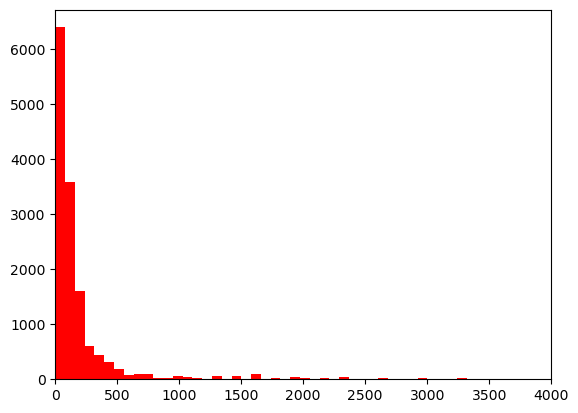

In [37]:
plt.hist(pharma_data.Final_Sales, color = 'red', bins = 500, alpha = 1)
plt.xlim(0,4000)

In [342]:
# Positively skewed shows means greater than median

In [38]:
pharma_data.RtnMRP.max()

Decimal('8014.000')

(0.0, 1000.0)

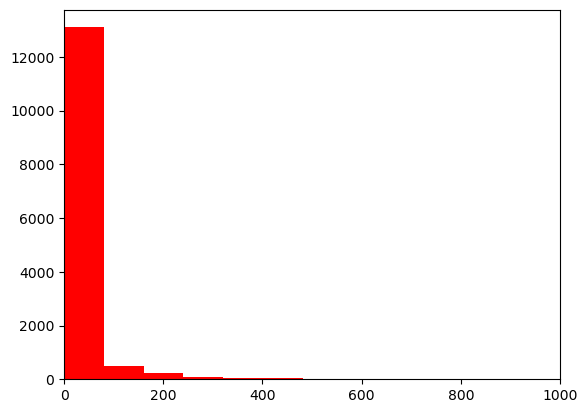

In [39]:
plt.hist(pharma_data.RtnMRP, color = 'red', bins = 100, alpha = 1)
plt.xlim(0,1000)

In [40]:
# Convert date formate to month
pharma_data['Dateofbill'] = pd.to_datetime(pharma_data['Dateofbill'])
pharma_data['Dateofbill'] = pharma_data['Dateofbill'].dt.strftime('%b')
pharma_data.head()

Typeofsales   Patient_ID    Specialisation         Dept Dateofbill  \
13062        Sale  12018072643  Specialisation11  Department1        Jan   
2433         Sale  12018080296  Specialisation27  Department1        Jan   
9895         Sale  12018080633  Specialisation14  Department1        Jan   
14140        Sale  12018075045   Specialisation4  Department1        Jan   
3749         Sale  12018081111  Specialisation11  Department2        Jan   

       Quantity  Final_Cost  Final_Sales RtnMRP Formulation  \
13062         5        87.0        304.0  0.000       Form1   
2433          3        66.0        449.0  0.000       Form1   
9895          1        78.0        126.0  0.000       Form2   
14140         1        48.0         50.0  0.000       Form1   
3749          1        45.0         47.0  0.000       Form1   

                     DrugName              SubCat  \
13062   PANTOPRAZOLE 40MG INJ          INJECTIONS   
2433   PARACETAMOL 1GM IV INJ          INJECTIONS   
9895          ENOXAPARIN 40MG          INJECTIONS   
14140    FLUCONAZOLE 50MG TAB  TABLETS & CAPSULES   
3749           EPHEDRINE 30MG          INJECTIONS   

                                     SubCat1  
13062  INTRAVENOUS & OTHER STERILE SOLUTIONS  
2433                  CENTRAL NERVOUS SYSTEM  
9895   CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  
14140                        ANTI-INFECTIVES  
3749   CARDIOVASCULAR & HEMATOPOIETIC SYSTEM

In [41]:
# Pivot the DataFrame based on SubCat of drugs
data_pivoted = pharma_data.pivot_table(index="SubCat", columns="Dateofbill", values="Quantity")

# Result
data_pivoted.head()

Dateofbill                         Apr       Aug       Dec       Feb  \
SubCat                                                                 
DROPS                         0.888889  0.666667  1.000000  1.000000   
INHALERS & RESPULES           2.360000  2.977778  2.722222  2.935484   
INJECTIONS                    2.782361  2.464607  2.405502  2.540490   
IV FLUIDS, ELECTROLYTES, TPN  1.869231  1.678445  1.592437  1.813636   
LIQUIDS & SOLUTIONS           5.714286  6.300000  9.161290  4.294118   

Dateofbill                          Jan       Jul       Jun        Mar  \
SubCat                                                                   
DROPS                          0.000000  1.000000  1.000000   1.000000   
INHALERS & RESPULES            3.666667  3.159091  3.266667   3.137931   
INJECTIONS                     2.329768  2.762735  2.283019   2.757296   
IV FLUIDS, ELECTROLYTES, TPN   1.942708  1.839844  2.050228   1.732218   
LIQUIDS & SOLUTIONS           11.086957  4.666667  1.050000  11.375000   

Dateofbill                         May        Nov       Oct       Sep  
SubCat                                                                 
DROPS                         0.666667   1.000000  1.000000  0.857143  
INHALERS & RESPULES           4.052632   2.954545  3.088889  3.068182  
INJECTIONS                    2.577532   2.510760  2.634218  2.444142  
IV FLUIDS, ELECTROLYTES, TPN  1.706767   1.485207  1.622951  1.505376  
LIQUIDS & SOLUTIONS           9.461538  13.400000  6.650000  1.095238

#### Data Distribution

((array([-3.89614943, -3.67566244, -3.55482318, ...,  3.55482318,
          3.67566244,  3.89614943]),
  array([  0,   0,   0, ..., 100, 100, 150], dtype=int64)),
 (2.660232114547922, 2.234489565707839, 0.5176655056900047))

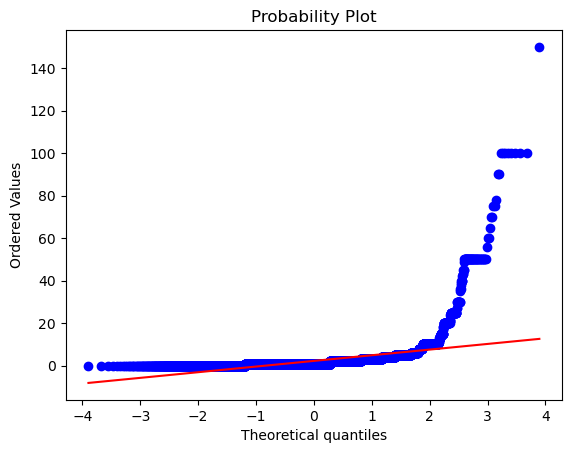

In [42]:
# Distribution of data
stats.probplot(pharma_data.Quantity, dist="norm", plot=pylab)

#### Data Transformation : Log Transformation

((array([-3.89614943, -3.67566244, -3.55482318, ...,  3.55482318,
          3.67566244,  3.89614943]),
  array([      -inf,       -inf,       -inf, ..., 4.60517019, 4.60517019,
         5.01063529])),
 (nan, nan, nan))

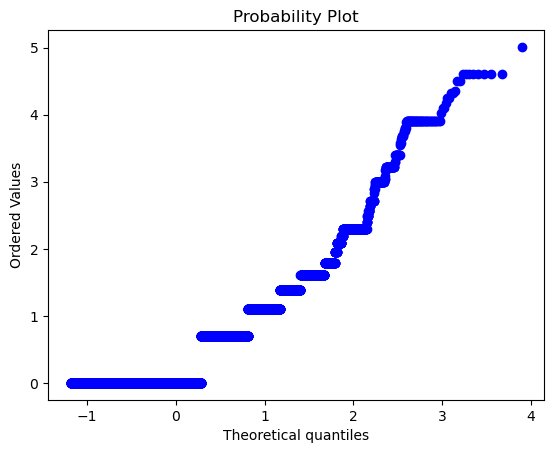

In [43]:
# Transform the data to a normal distribution
stats.probplot(np.log(pharma_data.Quantity),dist="norm",plot=pylab)

#### Bar Plot (Quantity of drugs sold by Month)

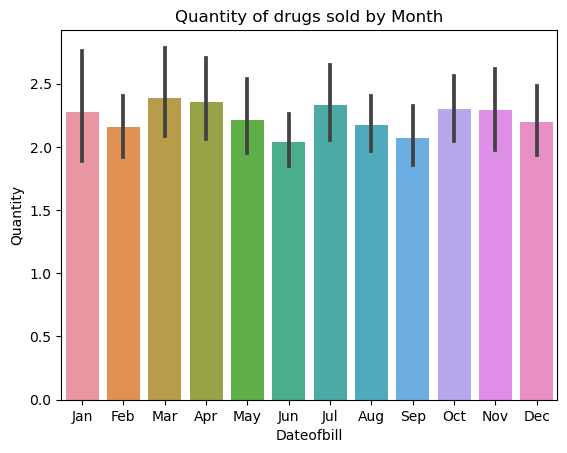

In [44]:
sns.barplot(data = pharma_data, x = 'Dateofbill', y = 'Quantity')
plt.title('Quantity of drugs sold by Month')
plt.show()

In [ ]:
# In March, April, July, and September has highest quantity sold. and it is approximately the same

#### Trend in Quantity

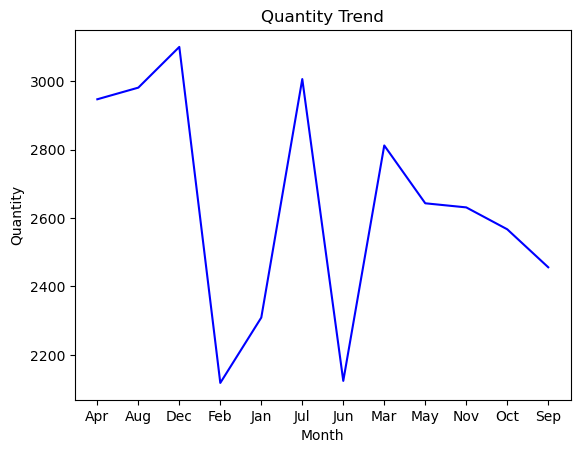

In [45]:
Month = pharma_data.groupby('Dateofbill')['Quantity'].sum()
plt.plot(Month.index, Month.values, color = 'blue')
plt.title('Quantity Trend')
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.show()

#### AutoEDA (D-Tale)

In [46]:
import dtale as dt

In [47]:
dt.show(pharma_data)

In [48]:
d = dt.show(pharma_data)
d.open_browser()

In [49]:
df_grouped = pharma_data[['Dateofbill','Quantity']]

In [50]:
# Group by Quantity and Month
df_grouped = df_grouped.groupby('Dateofbill').sum()

# Result
df_grouped.head(10)
df_grouped = df_grouped.reset_index()
df_grouped

Dateofbill  Quantity
0         Apr      2947
1         Aug      2981
2         Dec      3100
3         Feb      2118
4         Jan      2309
5         Jul      3006
6         Jun      2124
7         Mar      2812
8         May      2643
9         Nov      2631
10        Oct      2567
11        Sep      2456

In [51]:
# Create dictionary to map month names into numerical values
dict_month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Create a new column with the numerical values of the months
df_grouped['Monthindex'] = df_grouped['Dateofbill'].map(dict_month)

df_grouped = df_grouped.sort_values(by='Monthindex')

In [52]:
# Drop Monthindex column
df_grouped = df_grouped.drop(columns=['Monthindex'])
df_grouped = df_grouped.reset_index(drop=True)
df_grouped

Dateofbill  Quantity
0         Jan      2309
1         Feb      2118
2         Mar      2812
3         Apr      2947
4         May      2643
5         Jun      2124
6         Jul      3006
7         Aug      2981
8         Sep      2456
9         Oct      2567
10        Nov      2631
11        Dec      3100

#### One-Hot Encoding

In [53]:
data1 = pd.get_dummies(df_grouped.Dateofbill)
data1.columns

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object')

In [54]:
data = pd.concat([df_grouped , data1] , axis = 1)
data

Dateofbill  Quantity  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
0         Jan      2309    0    0    0    0    1    0    0    0    0    0   
1         Feb      2118    0    0    0    1    0    0    0    0    0    0   
2         Mar      2812    0    0    0    0    0    0    0    1    0    0   
3         Apr      2947    1    0    0    0    0    0    0    0    0    0   
4         May      2643    0    0    0    0    0    0    0    0    1    0   
5         Jun      2124    0    0    0    0    0    0    1    0    0    0   
6         Jul      3006    0    0    0    0    0    1    0    0    0    0   
7         Aug      2981    0    1    0    0    0    0    0    0    0    0   
8         Sep      2456    0    0    0    0    0    0    0    0    0    0   
9         Oct      2567    0    0    0    0    0    0    0    0    0    0   
10        Nov      2631    0    0    0    0    0    0    0    0    0    1   
11        Dec      3100    0    0    1    0    0    0    0    0    0    0   

    Oct  Sep  
0     0    0  
1     0    0  
2     0    0  
3     0    0  
4     0    0  
5     0    0  
6     0    0  
7     0    0  
8     0    1  
9     1    0  
10    0    0  
11    0    0

In [55]:
data['log_Quantity'] = np.log(data['Quantity'])
data

Dateofbill  Quantity  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
0         Jan      2309    0    0    0    0    1    0    0    0    0    0   
1         Feb      2118    0    0    0    1    0    0    0    0    0    0   
2         Mar      2812    0    0    0    0    0    0    0    1    0    0   
3         Apr      2947    1    0    0    0    0    0    0    0    0    0   
4         May      2643    0    0    0    0    0    0    0    0    1    0   
5         Jun      2124    0    0    0    0    0    0    1    0    0    0   
6         Jul      3006    0    0    0    0    0    1    0    0    0    0   
7         Aug      2981    0    1    0    0    0    0    0    0    0    0   
8         Sep      2456    0    0    0    0    0    0    0    0    0    0   
9         Oct      2567    0    0    0    0    0    0    0    0    0    0   
10        Nov      2631    0    0    0    0    0    0    0    0    0    1   
11        Dec      3100    0    0    1    0    0    0    0    0    0    0   

    Oct  Sep  log_Quantity  
0     0    0      7.744570  
1     0    0      7.658228  
2     0    0      7.941651  
3     0    0      7.988543  
4     0    0      7.879670  
5     0    0      7.661056  
6     0    0      8.008366  
7     0    0      8.000014  
8     0    1      7.806289  
9     1    0      7.850493  
10    0    0      7.875119  
11    0    0      8.039157

In [56]:
data["t"] = np.arange(1,13)

data["t_square"] = data["t"] * data["t"]
data

Dateofbill  Quantity  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  \
0         Jan      2309    0    0    0    0    1    0    0    0    0    0   
1         Feb      2118    0    0    0    1    0    0    0    0    0    0   
2         Mar      2812    0    0    0    0    0    0    0    1    0    0   
3         Apr      2947    1    0    0    0    0    0    0    0    0    0   
4         May      2643    0    0    0    0    0    0    0    0    1    0   
5         Jun      2124    0    0    0    0    0    0    1    0    0    0   
6         Jul      3006    0    0    0    0    0    1    0    0    0    0   
7         Aug      2981    0    1    0    0    0    0    0    0    0    0   
8         Sep      2456    0    0    0    0    0    0    0    0    0    0   
9         Oct      2567    0    0    0    0    0    0    0    0    0    0   
10        Nov      2631    0    0    0    0    0    0    0    0    0    1   
11        Dec      3100    0    0    1    0    0    0    0    0    0    0   

    Oct  Sep  log_Quantity   t  t_square  
0     0    0      7.744570   1         1  
1     0    0      7.658228   2         4  
2     0    0      7.941651   3         9  
3     0    0      7.988543   4        16  
4     0    0      7.879670   5        25  
5     0    0      7.661056   6        36  
6     0    0      8.008366   7        49  
7     0    0      8.000014   8        64  
8     0    1      7.806289   9        81  
9     1    0      7.850493  10       100  
10    0    0      7.875119  11       121  
11    0    0      8.039157  12       144

#### Model Building

##### Linear

In [57]:
# Data Partition
Train = data
Test = data

In [58]:
import statsmodels.formula.api as smf

linear = smf.ols('Quantity ~ t', data = Train).fit()
pickle.dump(linear,open('linear_model.pkl','wb'))

In [59]:
pred_linear =  pd.Series(linear.predict(pd.DataFrame(Test['t'])))
mape_linear = np.mean(np.abs((Test['Quantity'] - (pred_linear)) / Test['Quantity'])) * 100
mape_linear

10.619729507907643

##### Exponential

In [60]:
Exponential = smf.ols('log_Quantity ~ t', data = Train).fit()
pred_Exponential = pd.Series(Exponential.predict(pd.DataFrame(Test['t'])))

In [61]:
mape_Exponential = np.mean(np.abs((Test['Quantity'] - np.exp(pred_Exponential)) / Test['Quantity'])) * 100
mape_Exponential

10.57983440736149

##### Quadratic

In [62]:
Quadratic = smf.ols('Quantity ~ t + t_square', data = Train).fit()
pred_Quadratic = pd.Series(Quadratic.predict(Test[["t", "t_square"]]))

In [63]:
mape_Quadratic = np.mean(np.abs((Test['Quantity'] - (pred_Quadratic)) / Test['Quantity'])) * 100
mape_Quadratic

10.242750686398162

#### Additive Seasonality

In [64]:
addSeasonality = smf.ols('Quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec', data=Train).fit()
pred_addSeasonality = pd.Series(addSeasonality.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))

In [65]:
mape_addSeasonality = np.mean(np.abs((Test['Quantity'] - (pred_addSeasonality)) / Test['Quantity'])) * 100
mape_addSeasonality

4.981524154052393e-14

#### Multiplicative Seasonality

In [66]:
MulSeasonality = smf.ols('log_Quantity ~ Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_MultSeasonality = pd.Series(MulSeasonality.predict(Test))
mape_MultSeasonality = np.mean(np.abs((Test['Quantity'] - np.exp(pred_MultSeasonality)) / Test['Quantity'])) * 100
mape_MultSeasonality

3.154195335967755e-13

##### Additive Seasonality Quadratic Trend

In [67]:
add_seaQuadratic = smf.ols('Quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_seaQuadratic = pd.Series(add_seaQuadratic.predict(Test[['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov' , 'Oct' , 'Sep' ,'t','t_square']]))
mape_add_seaQuadratic = np.mean(np.abs((Test['Quantity'] - (pred_add_seaQuadratic)) / Test['Quantity'])) * 100
mape_add_seaQuadratic

5.089914489042366e-13

##### Multiplicative Seasonality Linear Trend

In [68]:
Mul_SeasonalityLinear = smf.ols('log_Quantity ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_MultSeasonalityLinear = pd.Series(Mul_SeasonalityLinear.predict(Test))

In [69]:
mape_MultSeasonalityLinear = np.mean(np.abs((Test['Quantity'] - np.exp(pred_MultSeasonalityLinear)) / Test['Quantity'])) * 100
mape_MultSeasonalityLinear

1.2808942630831927e-12

In [70]:
data1 = {"MODEL":pd.Series(["mape_linear","mape_Exponential","mape_Quadratic","mape_addSeasonality","mape_MultSeasonality","mape_add_seaQuadratic","mape_MultSeasonalityLinear"]),"MAPE_Values":pd.Series([mape_linear,mape_Exponential,mape_Quadratic,mape_addSeasonality,mape_MultSeasonality,mape_add_seaQuadratic,mape_MultSeasonalityLinear])}
table_mape = pd.DataFrame(data1)
table_mape

MODEL   MAPE_Values
0                 mape_linear  1.061973e+01
1            mape_Exponential  1.057983e+01
2              mape_Quadratic  1.024275e+01
3         mape_addSeasonality  4.981524e-14
4        mape_MultSeasonality  3.154195e-13
5       mape_add_seaQuadratic  5.089914e-13
6  mape_MultSeasonalityLinear  1.280894e-12

In [71]:
model_full = smf.ols('Quantity ~ t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()

In [72]:
predict_data = data
pred_new  = pd.Series(model_full.predict(predict_data))
pred_new

0     2309.0
1     2118.0
2     2812.0
3     2947.0
4     2643.0
5     2124.0
6     3006.0
7     2981.0
8     2456.0
9     2567.0
10    2631.0
11    3100.0
dtype: float64

In [73]:
predict_data["forecasted_Quantity"] = pd.Series(pred_new)

In [74]:
model_full.save("model.pickle")

In [75]:
# Load model
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model.pickle")

##### Autoregression Model

In [76]:
# Calculating Residuals from best model applied on full data
# AV - FV
full_res = data.Quantity - model_full.predict(data)

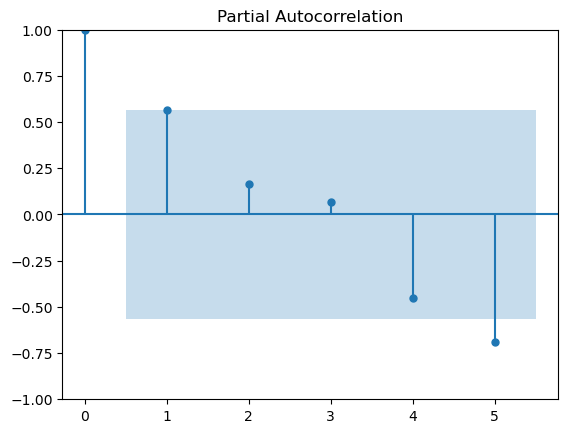

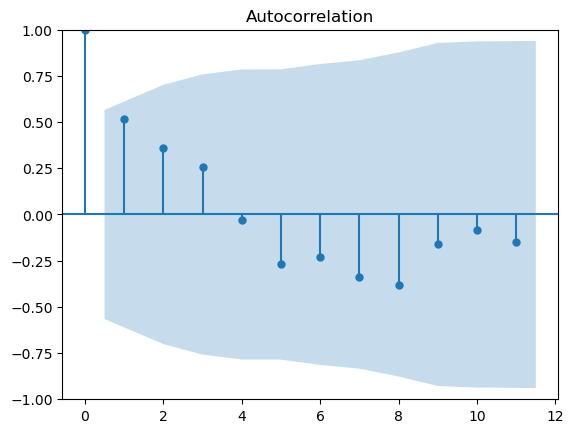

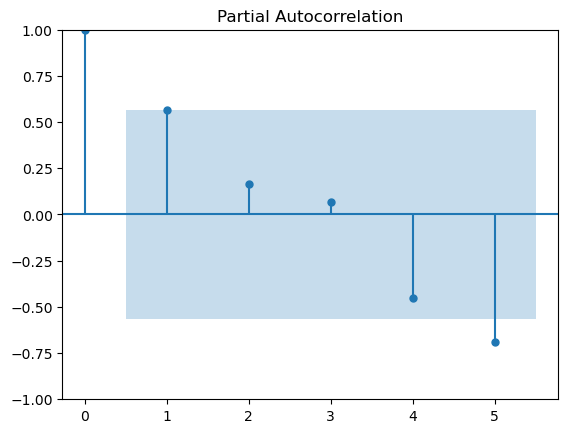

In [77]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA

tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In [78]:
# AR model
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags=[1])

# model_ar = AutoReg(Train_res, lags=12)
model_fit = model_ar.fit()

print('Coefficients: %s' % model_fit.params)

pred_res = model_fit.predict(start=len(full_res), end=len(full_res)+len(predict_data)-1, dynamic=False)
pred_res.reset_index(drop=True, inplace=True)

# The Final Predictions using ASQT and AR(1) Model
final_pred = pred_new + pred_res
final_pred

Coefficients: const    5.945876e-12
y.L1     7.143947e-01
dtype: float64


0     2309.0
1     2118.0
2     2812.0
3     2947.0
4     2643.0
5     2124.0
6     3006.0
7     2981.0
8     2456.0
9     2567.0
10    2631.0
11    3100.0
dtype: float64

#### ARIMA MODEL

In [80]:
train = df_grouped
test= df_grouped
train

Dateofbill  Quantity
0         Jan      2309
1         Feb      2118
2         Mar      2812
3         Apr      2947
4         May      2643
5         Jun      2124
6         Jul      3006
7         Aug      2981
8         Sep      2456
9         Oct      2567
10        Nov      2631
11        Dec      3100

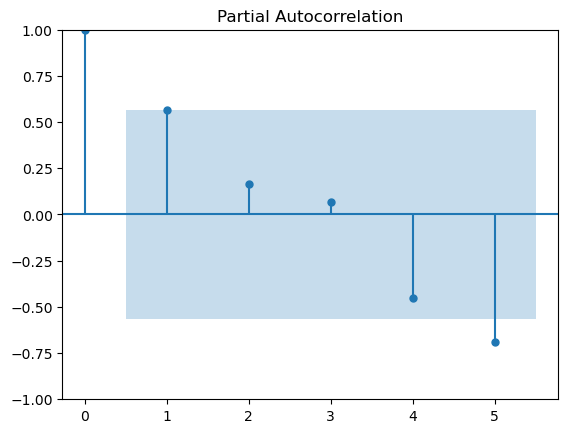

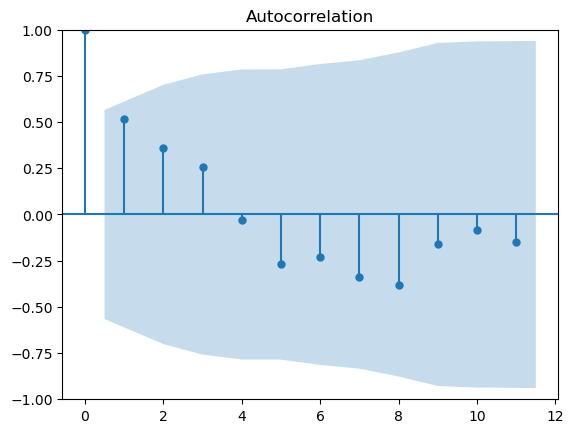

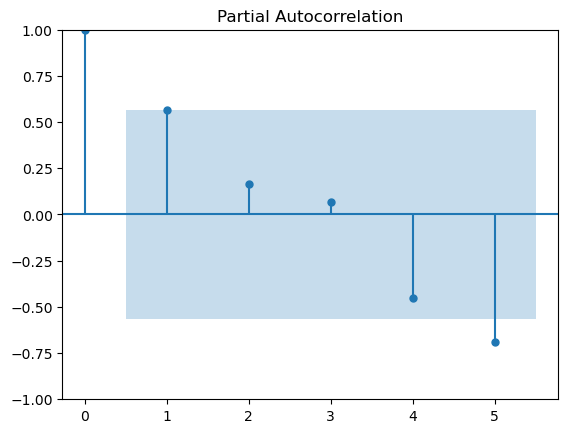

In [81]:
tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In [82]:
model1 = ARIMA(train.Quantity, order = (5,1,2))
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -104.833
Date:                Fri, 18 Aug 2023   AIC                            225.667
Time:                        18:47:31   BIC                            228.850
Sample:                             0   HQIC                           223.660
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7343      0.038    -19.306      0.000      -0.809      -0.660
ar.L2         -0.3149      0.065     -4.859      0.000      -0.442      -0.188
ar.L3          0.3095      0.076      4.057      0.000       0.160       0.459
ar.L4          0.7304      0.064     11.374      0.000       0.604       0.856
ar.L5          0.9986      0.037     27.238      0.000       0.927       1.070
ma.L1          0.0022      0.103      0.022      0.983      -0.200       0.205
ma.L2         -0.9977      0.108     -9.275      0.000      -1.209      -0.787
sigma2      1405.2802      0.000   1.01e+07      0.000    1405.280    1405.280
===================================================================================
Ljung-Box (L1) (Q):                   1.00   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.32   Prob(JB):                         0.64
Heteroskedasticity (H):               1.35   Skew:                             0.16
Prob(H) (two-sided):                  0.78   Kurtosis:                         1.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.03e+24. Standard errors may be unstable.
"""

In [83]:
start_index = len(train)
start_index
end_index = start_index + 11
forecast_test = res1.predict(start = start_index, end = end_index)

In [84]:
forecast_test = pd.DataFrame(forecast_test)
forecast_test

predicted_mean
12     2421.420044
13     2416.861490
14     2936.593086
15     2752.858158
16     2695.437655
17     2275.351410
18     2920.057300
19     2945.975663
20     2368.537861
21     2619.729944
22     2676.503204
23     3039.741242

In [85]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse_test = sqrt(mean_squared_error(test.Quantity, forecast_test))

print('test RMSE: %.3f' % rmse_test)

test RMSE: 130.886


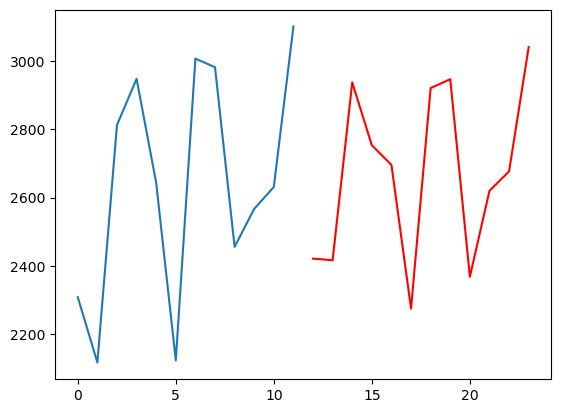

In [86]:
plt.plot(test.Quantity)
plt.plot(forecast_test, color = 'red')
plt.show()

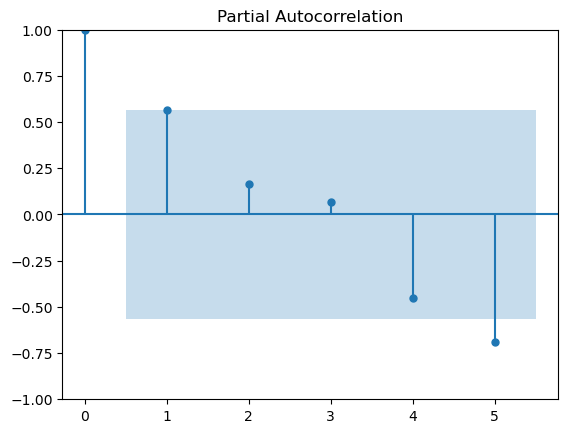

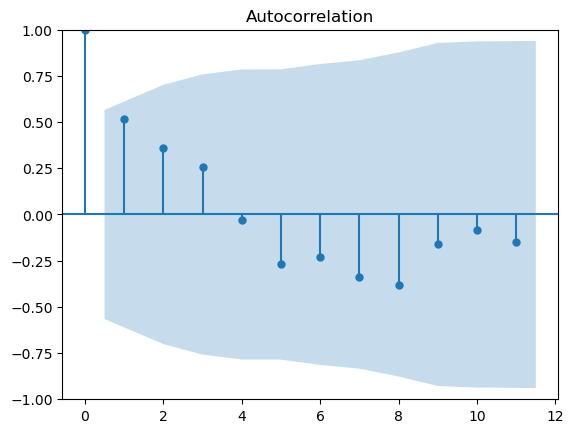

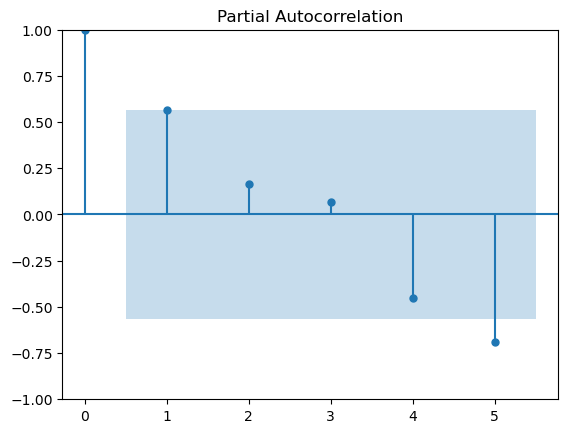

In [87]:
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima.model import ARIMA

tsa_plots.plot_acf(full_res, lags = 11)
tsa_plots.plot_pacf(full_res, lags = 5 )

In [88]:
import pmdarima as pm
# help(pm.auto_arima)

ar_model = pm.auto_arima(train.Quantity, start_p = 0, start_q = 0,
                      max_p = 16, max_q = 16, # maximum p and q
                      m = 1,              # frequency of series
                      d = None,           # let model determine 'd'
                      seasonal = False,   # No Seasonality
                      start_P = 0, trace = True,
                      error_action = 'warn', stepwise = True)

# Print model summary
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=225.331, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=188.013, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=186.510, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.465 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 18 Aug 2023   Prob (F-statistic):                nan
Time:                        18:49:25   Log-Likelihood:                 280.58
No. Observations:                  12   AIC:                            -537.2
Df Residuals:                       0   BIC:                            -531.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1178.8259        inf          0        nan         nan         nan
t            425.2873        inf          0        nan         nan         nan
t_square     -25.8510        inf         -0        nan         nan         nan
Jan          730.7377        inf          0        nan         nan         nan
Feb          192.0034        inf          0        nan         nan         nan
Mar          589.9710        inf          0        nan         nan         nan
Apr          480.6407        inf          0        nan         nan         nan
May          -15.9876        inf         -0        nan         nan         nan
Jun         -675.9140        inf         -0        nan         nan         nan
Jul          116.8617        inf          0        nan         nan         nan
Aug           54.3393        inf          0        nan         nan         nan
Sep         -456.4810        inf         -0        nan         nan         nan
Oct         -279.5994        inf         -0        nan         nan         nan
Nov          -98.0157        inf         -0        nan         nan         nan
Dec          540.2699        inf          0        nan         nan         nan
==============================================================================
Omnibus:                        1.289   Durbin-Watson:                   0.245
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                0.880
Skew:                           0.360   Prob(JB):                        0.644
Kurtosis:                       1.886   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The input rank is higher than the number of observations.
"""

In [89]:
# Predictions on test set
predictions =ar_model.predict(n_periods=len(test))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test.Quantity, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 328.134


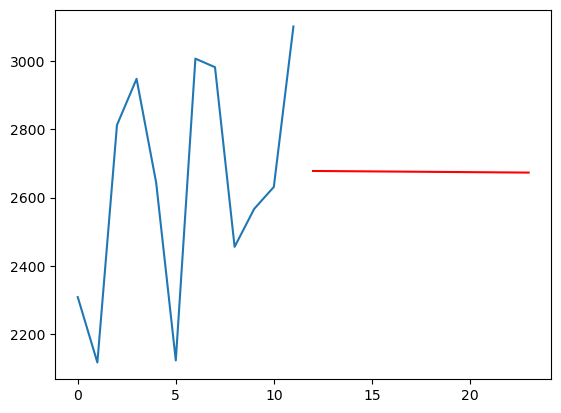

In [90]:
# Plot predictions against actual values
plt.plot(test.Quantity)
plt.plot(predictions, color='red')
plt.show()

#### Auto ARIMA

In [91]:
model = ARIMA(train.Quantity, order = (1,0,1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Quantity   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -85.332
Date:                Fri, 18 Aug 2023   AIC                            178.665
Time:                        18:50:02   BIC                            180.604
Sample:                             0   HQIC                           177.946
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2650.9313     46.568     56.926      0.000    2559.660    2742.203
ar.L1          0.2999      0.770      0.390      0.697      -1.208       1.808
ma.L1         -0.9992    178.989     -0.006      0.996    -351.811     349.812
sigma2       7.44e+04   1.33e+07      0.006      0.996    -2.6e+07    2.61e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.60   Prob(JB):                         0.87
Heteroskedasticity (H):               0.38   Skew:                            -0.29
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
# Forecast for next 12 months
start_index = len(Train)
end_index = start_index + 11
forecast_best = res.predict(start = start_index, end = end_index)


forecast_best

12    2412.942581
13    2579.565423
14    2629.530767
15    2644.513920
16    2649.006932
17    2650.354255
18    2650.758279
19    2650.879433
20    2650.915764
21    2650.926659
22    2650.929926
23    2650.930905
Name: predicted_mean, dtype: float64

In [93]:
# Evaluate forecasts
rmse_best = sqrt(mean_squared_error(test.Quantity, forecast_best))
print('Test RMSE: %.3f' % rmse_best)

Test RMSE: 303.864


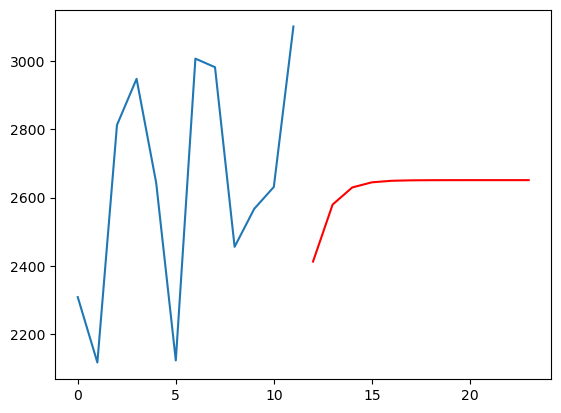

In [94]:
# Plot forecasts against actual outcomes
pyplot.plot(test.Quantity)
pyplot.plot(forecast_best, color = 'red')
pyplot.show()

#### Holt-Winters Method

In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='add', seasonal='mul')
model_fit = model.fit()

In [96]:
# Forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12    2603.222908
13    2397.616136
14    2958.387500
15    3163.444160
16    2662.448859
17    2451.855824
18    3024.936772
19    3234.208245
20    2721.674811
21    2506.095511
22    3091.486045
23    3304.972330
dtype: float64

In [97]:
# Prepare train and test datasets
train =df_grouped.Quantity
test =df_grouped.Quantity

In [98]:
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)

MAPE: nan


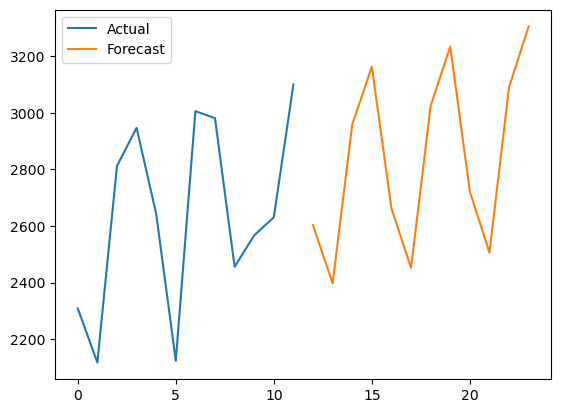

In [99]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [100]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='mul', seasonal='add')
model_fit = model.fit()

In [101]:
# Forecast for next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12     2814.446046
13     3046.696628
14     4211.809347
15     4881.522858
16     4842.024306
17     5349.015964
18     6826.097747
19     7850.052780
20     8212.796213
21     9176.534483
22    11172.252996
23    12785.121115
dtype: float64

In [102]:
# Prepare train and test datasets
train = df_grouped.Quantity
test = df_grouped.Quantity

In [103]:
# Calculate root mean squared error (RMSE) of the forecast
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)

rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

MAPE: nan
RMSE: 5032.711977063249


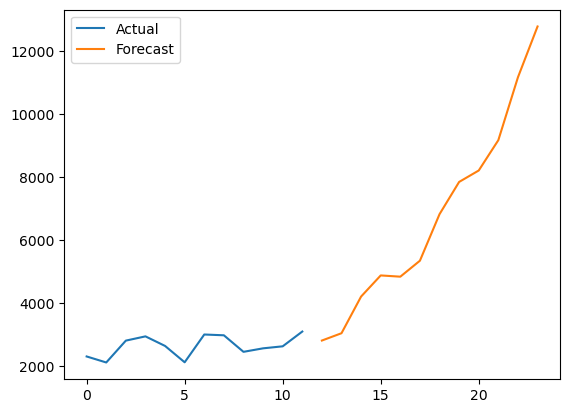

In [104]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [105]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='add', seasonal='add')
model_fit = model.fit()

# Forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12    2580.301417
13    2370.806486
14    2912.834890
15    3101.464395
16    2610.639267
17    2401.144336
18    2943.172739
19    3131.802245
20    2640.977117
21    2431.482186
22    2973.510589
23    3162.140095
dtype: float64

In [106]:
# Prepare train and test datasets
train = df_grouped.Quantity
test = df_grouped.Quantity

# Calculate root mean squared error (RMSE) of the forecast
mape= np.mean(np.abs((test - forecast) / test)) * 100
print("MAPE:",mape)
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

MAPE: nan
RMSE: 193.6155537648457


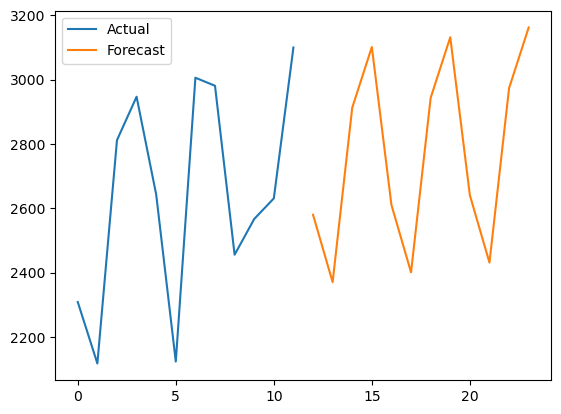

In [107]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

In [108]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters method on training data
hw_model = ExponentialSmoothing(Train['Quantity'], seasonal_periods=6, trend='add', seasonal='add').fit()

# Predictions on test data using the fitted model
pred_hw = hw_model.forecast(len(Test))

# Calculate MAPE between predicted and actual values
mape_hw = np.mean(np.abs((Test['Quantity'] - pred_hw) / Test['Quantity'])) * 100
mape_hw

nan

In [109]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Fit an Exponential Smoothing model to the data
model = ExponentialSmoothing(df_grouped['Quantity'], seasonal_periods=4, trend='mul', seasonal='mul')
model_fit = model.fit()

# Forecast for the next 12 periods
forecast = model_fit.forecast(steps=12)
forecast

12     2711.673811
13     2781.487457
14     4129.710668
15     4839.565928
16     4239.865995
17     4349.023852
18     6457.052377
19     7566.954005
20     6629.286892
21     6799.961803
22    10095.991886
23    11831.390203
dtype: float64

In [110]:
# Prepare train and test datasets
train =df_grouped.Quantity
test =df_grouped.Quantity

# Calculate root mean squared error (RMSE) of the forecast
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 4219.592650534886


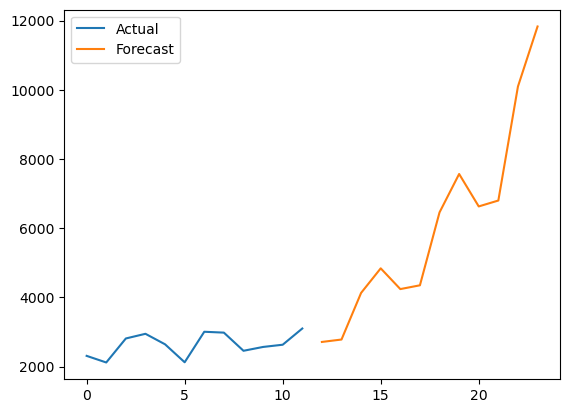

In [111]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

##### Exponential Smoothing

In [112]:
# Date column as index
# df_grouped.set_index('Dateofbill', inplace=True)
# Computed rolling mean of the sales data using SES

alpha =1   # smoothing parameter
df_grouped['SES'] = df_grouped['Quantity'].ewm(alpha=alpha, adjust=False).mean()

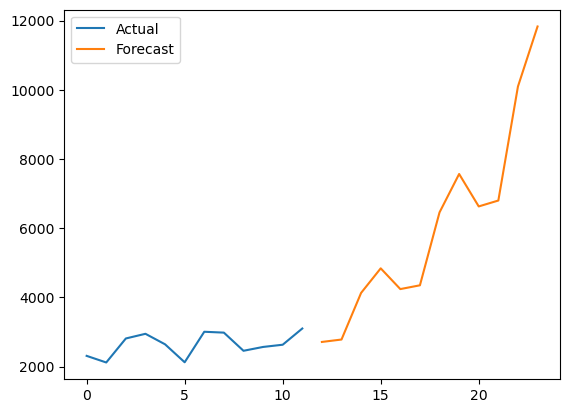

In [113]:
plt.plot(df_grouped['Quantity'], label='Actual')
plt.plot(forecast.index, forecast , label='Forecast')
plt.legend()
plt.show()

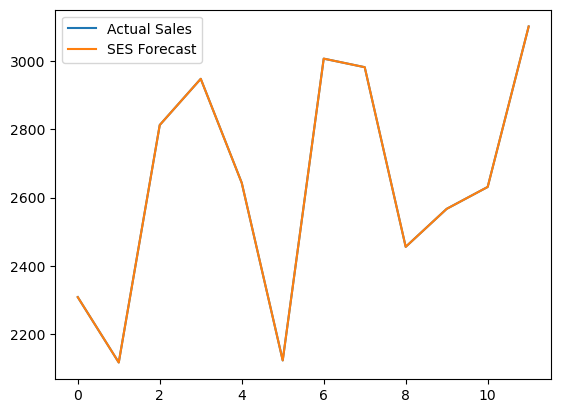

In [114]:
# Plot  of original sales data and the SES forecast
plt.plot(df_grouped['Quantity'], label='Actual Sales')
plt.plot(df_grouped['SES'], label='SES Forecast')
plt.legend()
plt.show()

### Random Forest & Linear Regression Model

In [115]:
df = data[['Dateofbill', 'Quantity']]

In [116]:
df.index.freq = 'MS'

In [117]:
df.head(10)

Dateofbill  Quantity
0        Jan      2309
1        Feb      2118
2        Mar      2812
3        Apr      2947
4        May      2643
5        Jun      2124
6        Jul      3006
7        Aug      2981
8        Sep      2456
9        Oct      2567

In [118]:
df.set_index('Dateofbill')

Quantity
Dateofbill          
Jan             2309
Feb             2118
Mar             2812
Apr             2947
May             2643
Jun             2124
Jul             3006
Aug             2981
Sep             2456
Oct             2567
Nov             2631
Dec             3100

<Axes: >

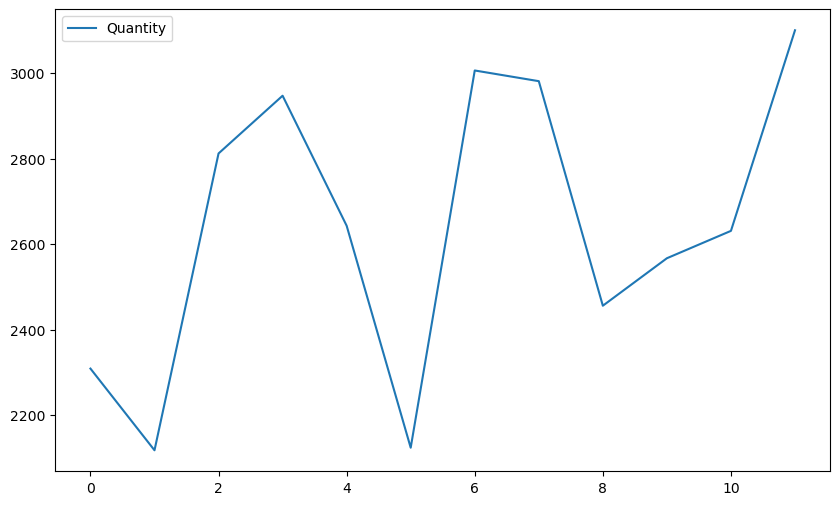

In [119]:
df.plot(figsize=(10,6))

In [120]:
df['Quantity_LastMonth']=df['Quantity'].shift(+1)
df['Quantity_2Monthsback']=df['Quantity'].shift(+2)
df['Quantity_3Monthsback']=df['Quantity'].shift(+3)
df

Dateofbill  Quantity  Quantity_LastMonth  Quantity_2Monthsback  \
0         Jan      2309                 NaN                   NaN   
1         Feb      2118              2309.0                   NaN   
2         Mar      2812              2118.0                2309.0   
3         Apr      2947              2812.0                2118.0   
4         May      2643              2947.0                2812.0   
5         Jun      2124              2643.0                2947.0   
6         Jul      3006              2124.0                2643.0   
7         Aug      2981              3006.0                2124.0   
8         Sep      2456              2981.0                3006.0   
9         Oct      2567              2456.0                2981.0   
10        Nov      2631              2567.0                2456.0   
11        Dec      3100              2631.0                2567.0   

    Quantity_3Monthsback  
0                    NaN  
1                    NaN  
2                    NaN  
3                 2309.0  
4                 2118.0  
5                 2812.0  
6                 2947.0  
7                 2643.0  
8                 2124.0  
9                 3006.0  
10                2981.0  
11                2456.0

In [121]:
df = df.dropna()
df

Dateofbill  Quantity  Quantity_LastMonth  Quantity_2Monthsback  \
3         Apr      2947              2812.0                2118.0   
4         May      2643              2947.0                2812.0   
5         Jun      2124              2643.0                2947.0   
6         Jul      3006              2124.0                2643.0   
7         Aug      2981              3006.0                2124.0   
8         Sep      2456              2981.0                3006.0   
9         Oct      2567              2456.0                2981.0   
10        Nov      2631              2567.0                2456.0   
11        Dec      3100              2631.0                2567.0   

    Quantity_3Monthsback  
3                 2309.0  
4                 2118.0  
5                 2812.0  
6                 2947.0  
7                 2643.0  
8                 2124.0  
9                 3006.0  
10                2981.0  
11                2456.0

In [122]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [123]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [124]:
import numpy as np
x1,x2,x3,y=df['Quantity_LastMonth'],df['Quantity_2Monthsback'],df['Quantity_3Monthsback'],df['Quantity']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[2812. 2118. 2309.]
 [2947. 2812. 2118.]
 [2643. 2947. 2812.]
 [2124. 2643. 2947.]
 [3006. 2124. 2643.]
 [2981. 3006. 2124.]
 [2456. 2981. 3006.]
 [2567. 2456. 2981.]
 [2631. 2567. 2456.]]


In [125]:
X_train,X_test,y_train,y_test=final_x[:],final_x[-10:],y[:],y[-10:]

In [127]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

#### Random Forest Regression

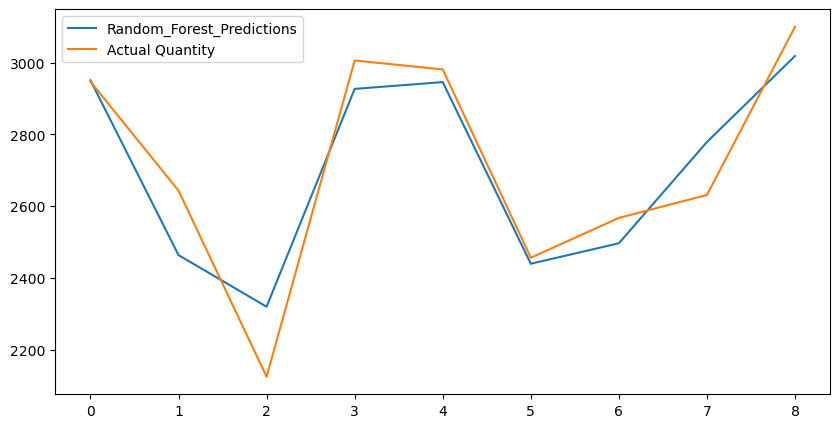

In [128]:
pred = model.predict(X_test)
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(pred, label='Random_Forest_Predictions')
plt.plot(y_test, label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()

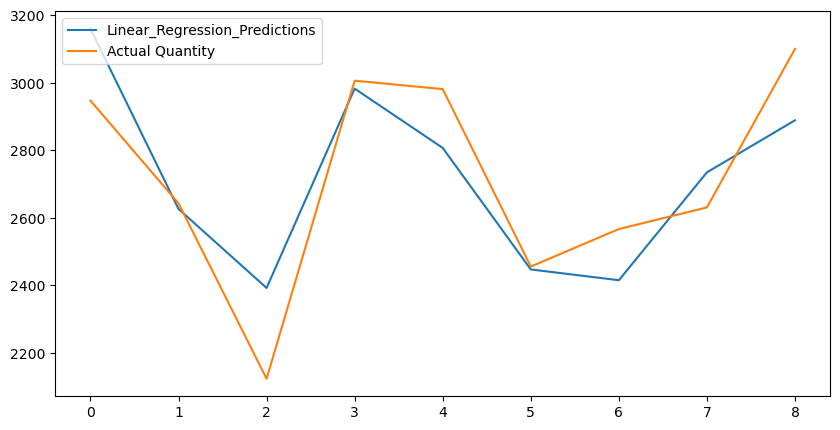

In [129]:
lin_pred=lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(lin_pred, label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Quantity')
plt.legend(loc="upper left")
plt.show()  

In [130]:
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [ ]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 111.41388986816473
Mean Squared Error for Linear Regression Model is: 158.76027698565974


2023-08-18 20:18:37,465 - INFO     - Executing shutdown due to inactivity...
2023-08-18 20:18:49,860 - INFO     - Executing shutdown...
2023-08-18 20:18:49,867 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\khair\anaconda3\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\khair\anaconda3\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\khair\anaconda3\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\khair\anaconda3\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\khair\anaconda3\lib\site-packages\dtale\app.py", line 440, in shutdown
    shutdown_server()
  File "c:\Users\khair\anaconda3\lib\site-packages\dtale\app.py", line